### AI / ML for designers

# Model for converting from celsius to fahrenheit

### Computational Design class

#### nj.namju@gmail.com

In [1]:
tableNumber = 3
X = []
y = []

for i in range(1, 10):
    X.append([tableNumber, i])
    y.append(tableNumber * i)

print(X)
print(y)

[[3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9]]
[3, 6, 9, 12, 15, 18, 21, 24, 27]


In [2]:

# linear model

In [3]:
from sklearn.linear_model import LinearRegression 
lrModel =  LinearRegression()
lrModel.fit(X, y)
print(lrModel.coef_)
print(lrModel.intercept_)

[0. 3.]
-8.881784197001252e-15


In [4]:
print(lrModel.predict([[3,4]]))
print(lrModel.predict([[3,5]]))

print(lrModel.predict([[3, 4.5]]))
print(lrModel.predict([[3, 12]]))

[12.]
[15.]
[13.5]
[36.]


In [5]:
pred = lrModel.predict(X)
print('predictions: ', pred)
from sklearn.metrics import r2_score
print(r2_score(pred, y))

predictions:  [ 3.  6.  9. 12. 15. 18. 21. 24. 27.]
1.0


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
  Dense(units=1, input_shape=[2])
])
model.compile(loss = tf.keras.losses.mean_squared_error, # for Regression losses # https://keras.io/api/losses/regression_losses/
              optimizer=tf.keras.optimizers.Adam(0.1), metrics=['mean_squared_error'])

In [ ]:
hist = model.fit(X,y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 6ms/step - loss: 5.8348 - mean_squared_error: 5.8348
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 5.7403 - mean_squared_error: 5.7403
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 5.6476 - mean_squared_error: 5.6476
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 5.5568 - mean_squared_error: 5.5568
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 5.4676 - mean_squared_error: 5.4676
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 5.3800 - mean_squared_error: 5.3800
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 5.2938 - mean_squared_error: 5.2938
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 5.2089 - mean_squared_error: 5.2089
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 5.1252 - mean_squared_error: 5.1252
Epoch 10/200
1/1 [===================

In [ ]:
hist.history.keys()

dict_keys(['loss', 'mean_squared_error'])

In [ ]:
import matplotlib.pyplot as plt

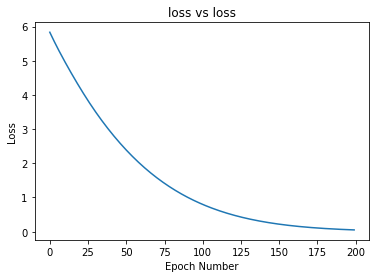

In [ ]:
plt.title("loss vs loss")
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(hist.history['loss'])
plt.show()

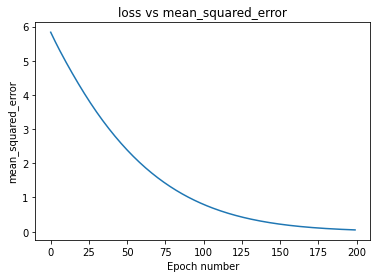

In [ ]:
plt.title("loss vs mean_squared_error")
plt.xlabel("Epoch number")
plt.ylabel("mean_squared_error")
plt.plot(hist.history['mean_squared_error']);

In [ ]:
print(model.predict([[3,1]]))

# we never train the value but it works!!
print(model.predict([[3,3.5]])) 
print(model.predict([[3,15]]))

[[3.]]
[[10.5]]
[[45.]]


In [ ]:
print("ground truth:", y)
print("prediction: ", model.predict(X))


ground truth: [3, 6, 9, 12, 15, 18, 21, 24, 27]
prediction:  [[ 3.]
 [ 6.]
 [ 9.]
 [12.]
 [15.]
 [18.]
 [21.]
 [24.]
 [27.]]


In [18]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [19]:
X = []
y = []

for i in range(2, 10):
    for j in range(1, 10):
        X.append([i, j])
        y.append(i * j)

In [20]:
xTrain = np.array(X)
yTrain = np.array(y)
xTrain.shape[1]

2

In [21]:
# model = keras.Sequential([
#     Dense(2, activation=tf.nn.relu, input_shape=[len(X[0])]),
#     Dense(1)
# ])

# model.compile(optimizer='adam', 
#                 loss='mse',
#                 metrics=['mae', 'mse'])
# model.summary()

In [22]:
model = keras.Sequential([
    Dense(64, activation='relu', input_shape=(xTrain.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1),
])
model.compile(optimizer='adam', 
             loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(xTrain, yTrain, epochs=2000, verbose=0) #, validation_split = 0.3)

In [24]:
history.history.keys()

dict_keys(['loss', 'mae'])

In [25]:
index = [] 
for i in history.history.keys():
    index.append(i)


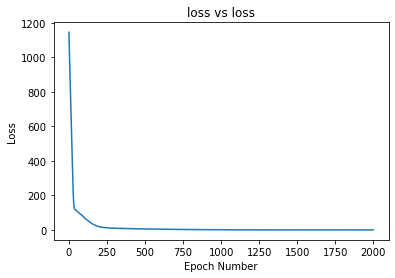

In [26]:
plt.title("loss vs loss")
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(history.history[index[0]])
plt.show()

In [27]:
print(model.predict([[3,3]]))
print(model.predict([[8,3]]))
print(model.predict([[8,8]]))
print(model.predict([[6,1]]))
print(model.predict([[3.5, 2.06]])) # 7.21
print(model.predict([[5.5, 8.1]])) # 44.55

[[9.381815]]
[[24.330147]]
[[64.8299]]
[[6.077544]]
[[7.4421363]]
[[44.74403]]


In [28]:
print("ground truth:", y)
print("prediction: ", model.predict(X))

ground truth: [2, 4, 6, 8, 10, 12, 14, 16, 18, 3, 6, 9, 12, 15, 18, 21, 24, 27, 4, 8, 12, 16, 20, 24, 28, 32, 36, 5, 10, 15, 20, 25, 30, 35, 40, 45, 6, 12, 18, 24, 30, 36, 42, 48, 54, 7, 14, 21, 28, 35, 42, 49, 56, 63, 8, 16, 24, 32, 40, 48, 56, 64, 72, 9, 18, 27, 36, 45, 54, 63, 72, 81]
prediction:  [[ 1.4355297]
 [ 3.91056  ]
 [ 5.825923 ]
 [ 7.783229 ]
 [ 9.899815 ]
 [11.99959  ]
 [13.993852 ]
 [16.084425 ]
 [17.84629  ]
 [ 3.090726 ]
 [ 6.076051 ]
 [ 9.381814 ]
 [11.993662 ]
 [15.100046 ]
 [18.098082 ]
 [21.0416   ]
 [24.068405 ]
 [27.013088 ]
 [ 4.1202183]
 [ 8.267068 ]
 [11.864603 ]
 [16.38905  ]
 [20.17413  ]
 [23.820227 ]
 [28.103603 ]
 [32.12244  ]
 [36.00012  ]
 [ 5.0851545]
 [ 9.932264 ]
 [15.077976 ]
 [19.920322 ]
 [24.965828 ]
 [29.898893 ]
 [34.998608 ]
 [40.07657  ]
 [44.994698 ]
 [ 6.0775433]
 [11.529583 ]
 [18.036213 ]
 [23.921404 ]
 [29.642637 ]
 [35.93661  ]
 [42.124325 ]
 [48.28567  ]
 [53.952015 ]
 [ 7.021367 ]
 [13.688376 ]
 [21.276762 ]
 [28.22395  ]
 [35.191654 